In [1]:
# Conventional way to import pandas
import pandas as pd
# Conventional way to import seaborn
import seaborn as sns
# Conventional way to import train_test_split that splits sets into training and testing sets
from sklearn.model_selection import train_test_split
# Conventional way to import numpy
import numpy as np
# Conventional way to import pyplot
import matplotlib.pyplot as plt
# Import r2 score to compare models. Tells me how well data fits to the model. How close data to line. Higher is better
from sklearn.metrics import r2_score
# Import mean squared error to get prediction errors. How far data points are from the regression line. Lower is better. Used after r2 as it does not determine whether coefficient estimates and predictions are biased (checks if there are more data under the line and more data above the line which r2 score can't do) 
from sklearn.metrics import mean_squared_error
# Import ElasticNet model
from sklearn.linear_model import ElasticNet
# Import Ridge Model
from sklearn.linear_model import Ridge
# Import Lasso Model
from sklearn.linear_model import Lasso

# Allow plots to appear within the notebook
%matplotlib inline

In [2]:
# --- Importing datasets ---
# Save the Paths to CSV data
all_room_observation_path = r'C:\Users\deano\OneDrive\Documents\University_Courses\Year_Three\CSC3095_Dissertation\Datasets\CSV_Format\AllData\LastObservationOfCO2AndOccupants.csv'
room_A_observation_path = r'C:\Users\deano\OneDrive\Documents\University_Courses\Year_Three\CSC3095_Dissertation\Datasets\CSV_Format\RoomA\RoomAObservationsOfCO2AndOccupants.csv'
room_A_and_D_observation_path = r'C:\Users\deano\OneDrive\Documents\University_Courses\Year_Three\CSC3095_Dissertation\Datasets\CSV_Format\RoomAandD\RoomAAndDObservationsOfCO2AndOccupants.csv'
room_B_observation_path = r'C:\Users\deano\OneDrive\Documents\University_Courses\Year_Three\CSC3095_Dissertation\Datasets\CSV_Format\RoomB\RoomBObservationsOfCO2AndOccupants.csv'
room_B_and_C_observation_path = r'C:\Users\deano\OneDrive\Documents\University_Courses\Year_Three\CSC3095_Dissertation\Datasets\CSV_Format\RoomBandC\RoomBAndCObservationsOfCO2AndOccupants.csv'
room_C_observation_path = r'C:\Users\deano\OneDrive\Documents\University_Courses\Year_Three\CSC3095_Dissertation\Datasets\CSV_Format\RoomC\RoomCObservationsOfCO2AndOccupants.csv'
room_D_observation_path = r'C:\Users\deano\OneDrive\Documents\University_Courses\Year_Three\CSC3095_Dissertation\Datasets\CSV_Format\RoomD\RoomDObservationsOfCO2AndOccupants.csv'

In [3]:
# Save a dictionary of all Paths to CSV files
observations = {'all_rooms': all_room_observation_path, 'room_A': room_A_observation_path, 'room_A_and_D': room_A_and_D_observation_path, 'room_B': room_B_observation_path, 'room_B_and_C': room_B_and_C_observation_path, 'room_C': room_C_observation_path, 'room_D': room_D_observation_path}

In [4]:
# Read Observations CSV file directly from file path and save results
data_observations = pd.read_csv(observations['all_rooms'])

In [5]:
# --- Data Exploration ---

# Display the first 5 rows of CSV file to verify it's the correct file
data_observations.head()

,CO2,Occupants
0,548.00,0
1,661.76,1
2,465.95,10
3,478.72,12
4,482.88,0


In [6]:
# Display the last 5 rows
data_observations.tail()

,CO2,Occupants
86,535.12,23
87,540.80,1
88,497.92,4
89,563.84,0
90,682.88,2


In [7]:
# Display the different datatypes available
data_observations.dtypes

CO2          float64
Occupants      int64
dtype: object

In [8]:
# Check the shape of the Dataframe (rows, columns)
data_observations.shape

(91, 2)

In [9]:
# --- Data Visualization ---

# Set the background colour of the plots to white
sns.set(style="whitegrid", color_codes=True)

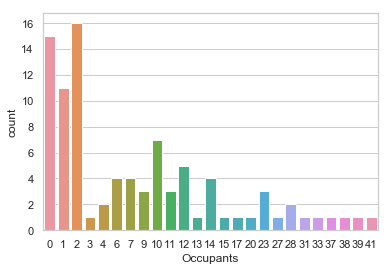

In [10]:
sns.countplot('Occupants', data=data_observations)

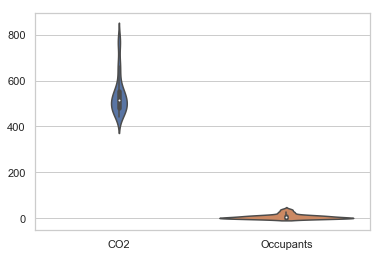

In [11]:
# Plots violin plot to see distribution of data
sns.violinplot(data=data_observations)

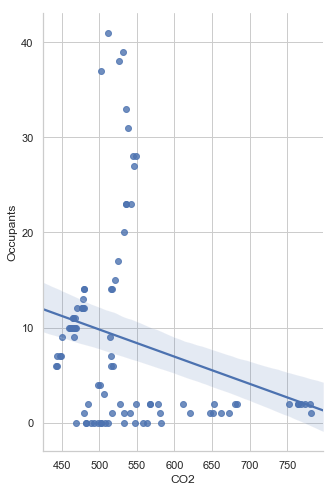

In [12]:
# Visualize the relationship between the features and the respose of last observations using scatterplots
sns.pairplot(data_observations, x_vars='CO2', y_vars='Occupants', height=7, aspect=0.7, kind='reg')

In [13]:
# --- Training and Testing sets ---

# Create a Python list of feature name
feature_cols = ['CO2']

# Use the list to select a subset of the original Dataframe
X = data_observations[feature_cols]

# Print the first 5 rows
X.head()

,CO2
0,548.00
1,661.76
2,465.95
3,478.72
4,482.88


In [14]:
# Checks the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(91, 1)


In [15]:
# Select a series from the DataFrame
y = data_observations['Occupants']

# Print the first 5 values
y.head()

0     0
1     1
2    10
3    12
4     0
Name: Occupants, dtype: int64

In [16]:
# Check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(91,)


In [17]:
# Creates training sets and testing sets
# Default is 75% for training and 25% for testing 
# Changed to 70% for training and 30% for testing due to low dataset size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [18]:
# Check the training and testing set shapes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(63, 1)
(63,)
(28, 1)
(28,)


In [19]:
# --- Building Models ---

# Elastic Net
enet = ElasticNet(alpha=0.1, l1_ratio=0.1, random_state=0)

enet.fit(X_train, y_train)

y_pred_enet = enet.predict(X_test)
                                                 
r2_score_enet = r2_score(y_test, y_pred_enet)
                                                 
print("r^2 on test data : %f" % r2_score_enet)

print("coefficient : %f" % enet.coef_)

print("intercept : %f" % enet.intercept_)

r^2 on test data : 0.045689
coefficient : -0.029075
intercept : 24.228600


In [20]:
# Lasso
las = Lasso(alpha=0.1, random_state=0)

las.fit(X_train, y_train)

y_pred_las = las.predict(X_test)

r2_score_las = r2_score(y_test, y_pred_las)

print("r^2 on test data : %f" % r2_score_las)

print("coefficient: %f" % las.coef_)

print("intercept: %f" % las.intercept_)

r^2 on test data : 0.045692
coefficient: -0.029065
intercept: 24.222982


In [21]:
# Ridge
rid = Ridge(alpha=0.1, random_state=0)

rid.fit(X_train, y_train)

y_pred_rid = rid.predict(X_test)

r2_score_rid = r2_score(y_test, y_pred_rid)

print("r^2 on test data : %f" % r2_score_rid)

print("coefficient : %f" % rid.coef_)

print("intercept : %f" % rid.intercept_)

r^2 on test data : 0.045689
coefficient : -0.029077
intercept : 24.229409


In [22]:
# --- Performance Comparison --- (it's the r2 score so how much co2 has an effect on number of occupants)

# Elastic Net - r2 score (higher is better)
enet.score(X_test, y_test)

0.04568927551205737

In [23]:
# Elastic Net - root mean squared error (predict bias, lower is better)
print(np.sqrt(mean_squared_error(y_test, y_pred_enet)))

8.60921243085486


In [24]:
# Lasso - r2 score
las.score(X_test, y_test)

0.04569208081932841

In [25]:
# Lasso - root mean squared error
print(np.sqrt(mean_squared_error(y_test, y_pred_las)))

8.609199776955371


In [26]:
# Ridge - r2 score
rid.score(X_test, y_test)

0.04568887071875638

In [27]:
# Ridge - root mean squared error
print(np.sqrt(mean_squared_error(y_test, y_pred_rid)))

8.609214256754465


In [28]:
# --- Prediction ---

roomCO2 = 552.96

# Elastic Net
y_new_pred_enet = enet.predict([[roomCO2]])

# Lasso
y_new_pred_las = las.predict([[roomCO2]])

# Ridge
y_new_pred_rid = rid.predict([[roomCO2]])

In [29]:
# --- Print Results ---

# Elastic Net
print("Elastic Net : Predicted=%s" % (y_new_pred_enet[0]))

# Lasso
print("Lasso : Predicted=%s" % (y_new_pred_las[0]))

# Ridge
print("Ridge : Predicted=%s" % (y_new_pred_rid[0]))

Elastic Net : Predicted=8.15107065161462
Lasso : Predicted=8.15118084176438
Ridge : Predicted=8.15105480006019
